<a href="https://colab.research.google.com/github/Seouyang/Today-I-Learned/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Polynomial regression is a form of regression analysis in which the relationship between $x$ and $y$ is modeled as an $n^{\text{th}}$ degree polynomial in $x$.
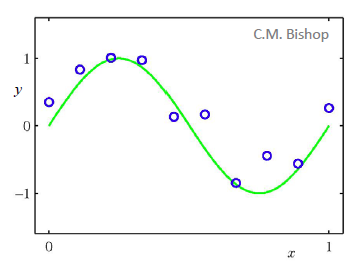

Polynomial regression is fitting a curve, so that we can predict a $y$ value for any $x$ value.

$$y(x, \boldsymbol{w})=w_{0}+w_{1}x+w_{2}x^{2}+\cdots+w_{M}x^{M}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Step 1. Data generation**

We are goint to generate the samples with random noise as following:
$$y=2\sin(1.4x)+\epsilon$$
The blue line indicates the ground truth value.

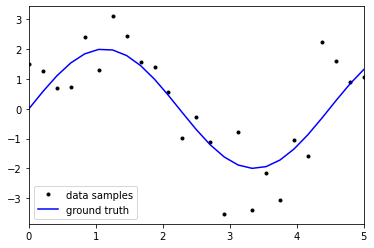

In [6]:
def sample(sample_size, interval, noise=1.):
  x = np.linspace(*interval, sample_size)
  ground_truth = 2*np.sin(1.4*x)
  y = ground_truth + np.random.randn(x.size)*noise
  return x, y, ground_truth

sample_size = 25
interval = (0, 5)

np.random.seed(2021)
x, y, ground_truth = sample(sample_size, interval)
plt.plot(x, y, 'k.', label='data samples') #point means dots
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.xlim(*interval)
plt.legend()
plt.show()

**Step 2-1. Polynomial regression using Scikit-learn**


In [8]:
#how PolynomialFeatures method works
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x1 = np.array([1, 2, 3]).reshape(-1, 1)
poly.fit_transform(x1)

[[1]
 [2]
 [3]]


array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16.],
       [ 1.,  3.,  9., 27., 81.]])

In [9]:
from sklearn.linear_model import LinearRegression

#fitting a polynomial model with the input samples x
def fit_polynomial(x, y, degree):
  poly = PolynomialFeatures(degree)
  model = LinearRegression()
  X = poly.fit_transform(x.reshape(-1, 1))
  model.fit(X, y)
  return model

In [10]:
#evaluate a fitted polynomial model with input sample x
def evaluate_polynomial(model, x):
  degree = model.coef_.size - 1
  poly = PolynomialFeatures(degree)
  X = poly.fit_transform(x.reshape(-1, 1))
  y = model.predict(X)
  return y

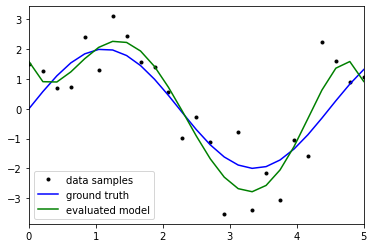

In [11]:
degree = 5
model = fit_polynomial(x, y, degree)
p_y = evaluate_polynomial(model, x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.plot(x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

**Step 2-2. Polynomial regression with regularization**

In [12]:
from sklearn.linear_model import Ridge

def fit_polynomial_reg(x, y, degree, lambda_):
  poly = PolynomialFeatures(degree)
  model = Ridge(alpha=lambda_)
  X = poly.fit_transform(x.reshape(-1, 1))
  model.fit(X, y)
  return model

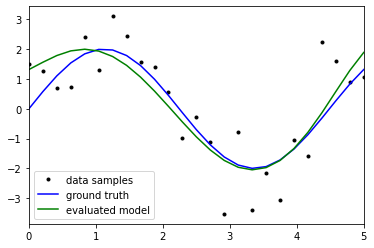

In [13]:
np.random.seed(2021)
x, y, ground_truth = sample(sample_size, interval)
degree = 5
lambda_ = 1

model = fit_polynomial_reg(x, y, degree, lambda_)
p_y = evaluate_polynomial(model, x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.plot(x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

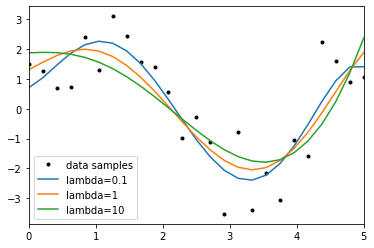

In [14]:
degree = 5
lambdas = [0.1, 1, 10]

plt.plot(x, y, 'k.', label='data samples')
for lambda_ in lambdas:
  model = fit_polynomial_reg(x, y, degree, lambda_)
  p_y = evaluate_polynomial(model, x)
  plt.plot(x, p_y, label='lambda={}'.format(lambda_))

plt.xlim(*interval)
plt.legend()
plt.show()

**Step 3. Compute integrated squared bias and integrated variance**

Compute bias and variance of models trained on 100 different datasets.
The average prediction is estimated from
$$\bar{y}(x)=\frac{1}{L}\sum_{l=1}^Ly^{(l)}(x)$$
and the integrated squared bias and integrated variance are given by
$$(bias)^2=\frac{1}{N}\sum_{n=1}^N\{\bar{y}(x_n)-h(x_n)\}^2,$$
$$variance=\frac{1}{N}\sum_{n=1}^N\frac{1}{L}\sum_{l=1}^L\{y^{(l)}(x_n)-\bar{y}(x_n)\}^2.$$

Here, $N$ is the number of data points, $L$ is the number of datasets, $y^{(l)}$ is $l^{th}$ model prediction function, and $h$ is the optimal prediction function.

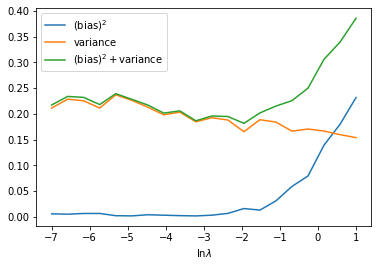

In [15]:
from numpy.linalg import norm

np.random.seed(10)
degree = 5
sample_size = 25
n_models = 100
linpenals = np.linspace(start=-7, stop=1, num=20)
lambdas = np.power(np.e, linpenals)

x_test, y_test, ground_truth = sample(sample_size, interval, noise=2.)
bias = []
variance = []

for lambda_ in lambdas:
  avg_y = np.zeros(sample_size)
  models = []
  for i in range(n_models):
    x, y, _ = sample(sample_size, interval, noise=1.)
    model = fit_polynomial_reg(x, y, degree, lambda_)
    p_y = evaluate_polynomial(model, x_test)
    avg_y = avg_y + p_y
    models.append(p_y)
  avg_y = avg_y / n_models

  bias_val = norm(avg_y - ground_truth)**2 / sample_size
  bias.append(bias_val)

  var_val = 0
  for p_y in models:
    var_val = var_val + (norm(avg_y - p_y)**2 / sample_size)
  variance.append(var_val / n_models)

plt.plot(linpenals, bias, label='(bias)$^{2}$')
plt.plot(linpenals, variance, label='variance')
plt.plot(linpenals, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$\ln\lambda$')
plt.legend()
plt.show()

Reference: KAIST EE488 lecture practice material 